Challenge_1: Aerial Cactus-AML

In [1]:
# Imports
%reset -f
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import wandb
from customDatasets.CactusDataset import CactusDataset
from models.CactusResNet34 import CactusModel
from torch.utils.data import ConcatDataset

In [2]:
# free gpu
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Phase 1: Loading the data, analyzing it, doing feature engineering and creating the Loader

In [3]:
# load data for displaying
dataset=CactusDataset(root_dir='./data/train/train',labels_path='./data/train.csv')
# take the first sample from train_dataloader
_, train_features, train_labels = dataset[0]
image_np = np.array(train_features)
print("Image shape: "+str(image_np.shape))
print("Image python class"+str(type(train_features)))
print("Label: "+str(train_labels))

Image shape: (32, 32, 3)
Image python class<class 'PIL.JpegImagePlugin.JpegImageFile'>
Label: 1


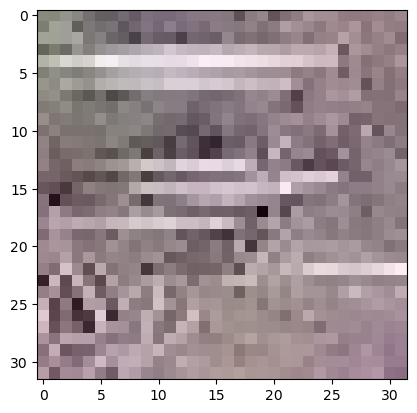

In [4]:
# show the image
plt.imshow(image_np)

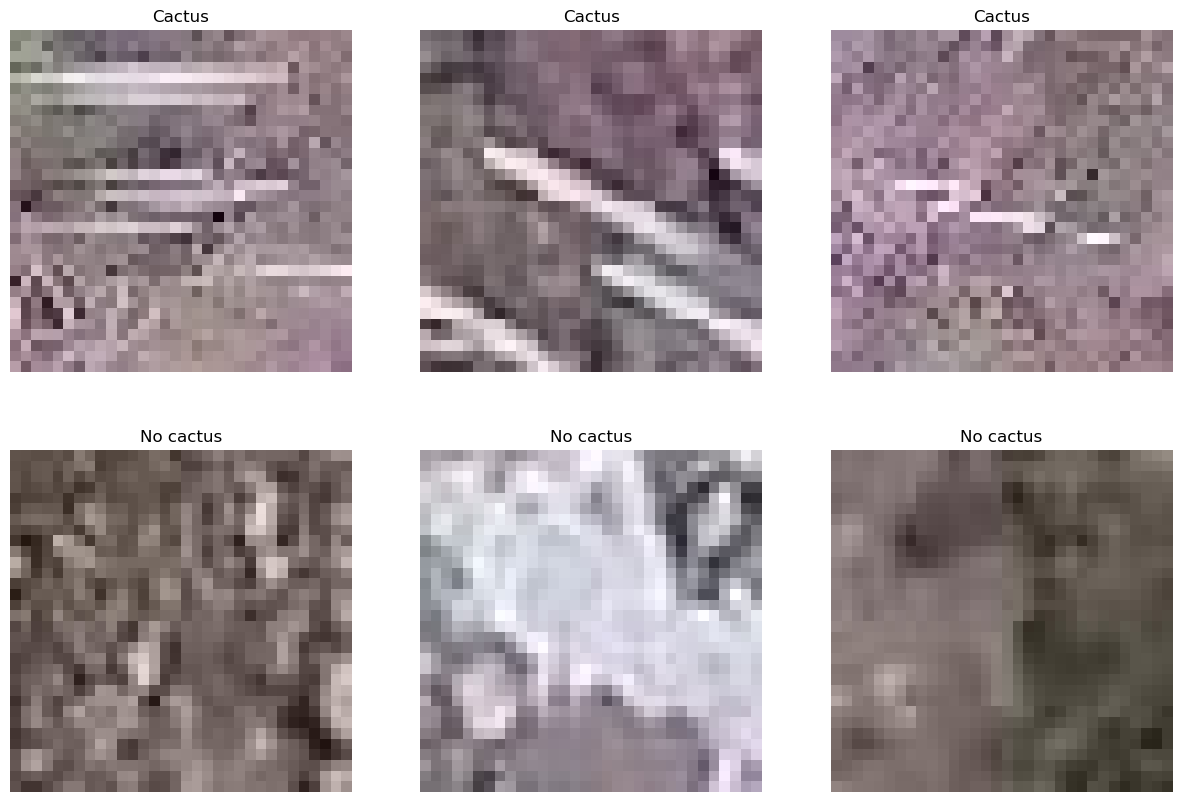

In [5]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Define a transformation to convert PIL image to PyTorch tensor
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

cactus_images = []
no_cactus_images = []
for i in range(len(dataset)):
    _, image, label = dataset[i]
    # Apply the transformation to convert PIL image to PyTorch tensor
    image = transform(image)
    if label == 1 and len(cactus_images) < 3:
        cactus_images.append((image, 1))
    elif label == 0 and len(no_cactus_images) < 3:
        no_cactus_images.append((image, 0))
    if len(cactus_images) == 3 and len(no_cactus_images) == 3:
        break

# Concatenate the vectors
images = cactus_images + no_cactus_images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (image, label) in enumerate(images):
    ax = axes[i // 3, i % 3]
    # Convert the PyTorch tensor back to numpy array and permute dimensions
    ax.imshow(image.permute(1, 2, 0).numpy())
    ax.set_title('Cactus' if label == 1 else 'No cactus')
    ax.axis('off')
plt.show()



In [6]:
label_graph=False
if label_graph:
    def get_label_distribution(data):
        label_counts = {}
        for _, _, label in data:
            if label not in label_counts:
                label_counts[label] = 0
            label_counts[label] += 1
        sorted_distribution = sorted(label_counts.items(), key=lambda x: x[0])
        # take only the count
        return [x[1] for x in sorted_distribution]
    label_distribution = get_label_distribution(dataset) # they are sorted in ascending order
    print(label_distribution)
    fig, ax = plt.subplots()
    ax.pie(label_distribution, labels=['no cactus','cactus'], autopct='%1.1f%%')
    plt.show()

In [7]:
graph_gen=False
if graph_gen:
    # Define the transformation
    transform = transforms.Compose([transforms.ToTensor()])
    
    # Load the test dataset
    test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=transform)
    
    # Create the data loader for the test dataset
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Load the training dataset
    dataset = CactusDataset(root_dir='./data/train/train', labels_path='./data/train.csv', transform=transform)
    
    # Create the data loader for the training dataset
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Compute the average value for each channel and for each pixel in the training set
    mean_train = torch.zeros(3, 32, 32)
    for _, images, _ in dataloader:
        mean_train += images.mean(dim=0)
    mean_train /= len(dataloader)
    
    # Compute the average value for each channel and for each pixel in the test set
    mean_test = torch.zeros(3, 32, 32)
    for _, images, _ in test_dataloader:
        mean_test += images.mean(dim=0)
    mean_test /= len(test_dataloader)
    
    print(mean_train.shape)
    print(mean_test.shape)
    
    # flatten dimensions 2 and 3
    mean_train = mean_train.flatten(1, 2)
    mean_test = mean_test.flatten(1, 2)
    
    print(mean_train.shape)
    print(mean_test.shape)
    
    # create a plot for each channel and put in it x=pixel number and y=value taken from main_train and test_train using histograms
    fig, ax = plt.subplots(3, 1, figsize=(15, 10))
    for i in range(3):
        ax[i].plot(mean_train[i], label='Train')
        ax[i].plot(mean_test[i], label='Test')
        ax[i].set_title(f'Mean value for channel {i}')
        ax[i].set_xlabel('Pixel number')
        ax[i].set_ylabel('Mean value')
        ax[i].legend()

In [8]:
print("Number of train values: "+str(dataset.__len__()))

Number of train values: 17500


Image python class<class 'torch.Tensor'>
Image shape: torch.Size([3, 224, 224])
Label shape: 1


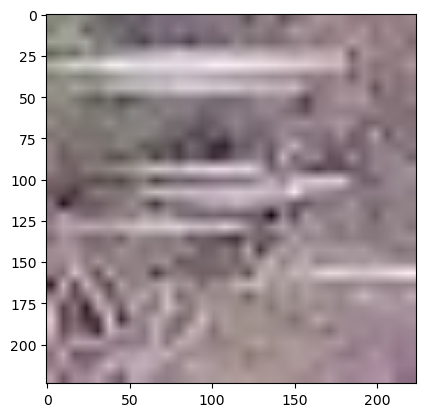

In [9]:
transform_dataset = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

dataset = CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transform_dataset)
_, image, label = dataset[0]
print("Image python class"+str(type(image)))
print("Image shape: "+str(image.shape))
print("Label shape: "+str(label))
# show the image
plt.imshow(image.permute(1,2,0))

In [10]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [11]:
for i, (img_name, images, labels) in enumerate(dataloader):
    print("Batch number: "+str(i))
    print("Batch image names: "+str(img_name))
    print("Batch images shape: "+str(images.shape))
    print("Batch labels shape: "+str(labels.shape))
    break

Batch number: 0
Batch image names: ('./data/train/train/7c8cc7bf73b793de4ffa1ac0c778169d.jpg', './data/train/train/dc04bd6b3aa9b265fba6636825f870aa.jpg', './data/train/train/9edfbdcbb9fb0f775cba5baba3305362.jpg', './data/train/train/4ff4d206ad5dadb9ba0aa653dedcaae1.jpg', './data/train/train/2ae8ca68709aad3b308b53889a8afc1c.jpg', './data/train/train/c8359eae33e1aeefbc5bc0777955afb9.jpg', './data/train/train/fdb8a181326633951165c1a6ef7c3215.jpg', './data/train/train/76accba2e79a48c0652844e49f6a6d7a.jpg', './data/train/train/bf191e806bfd4a757369e37105f8c88b.jpg', './data/train/train/fefee3a0a8ac6309a64e9c3020fe72f7.jpg', './data/train/train/78c94d98e0f691f206c361c9ebb317db.jpg', './data/train/train/a941ba2ac92b8ed02c731b614481491a.jpg', './data/train/train/512e236327b0e9b121934573ed074662.jpg', './data/train/train/a45b87d246481c44e2bdeff928fb059d.jpg', './data/train/train/dc06dcef023d9df09aa28894d3f8bb9a.jpg', './data/train/train/0b450d5a64f0a20cdd6bb0cf7ab7b4c6.jpg', './data/train/train/

In [12]:
CLIP=False
if CLIP:
    from transformers import CLIPProcessor, CLIPModel
    from torch.utils.data import DataLoader
    import torch
    from torchvision.transforms import ToPILImage
    
    # Assuming you have defined CLIPProcessor, CLIPModel, and test_dataloader
    
    test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=transforms.Compose([transforms.Resize(224),transforms.ToTensor()]))
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    dataset = CactusDataset(root_dir='./data/train/train', labels_path='./data/train.csv', transform=transforms.Compose([transforms.ToTensor()]))   
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Initialize the CLIP model and processor
    model_id = "openai/clip-vit-base-patch32"
    processor = CLIPProcessor.from_pretrained(model_id)
    model = CLIPModel.from_pretrained(model_id)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Define a function to classify images
    def classify_images(dataloader, model, processor):
        predictions = []
        candidate_labels = [("a photo without a cactus",0),("a photo with a cactus",1)]  # Candidate labels for classification
        for image_names, images, _ in dataloader:
            # Convert images to PIL format
            images = [ToPILImage()(image) for image in images]
            # Process the images
            inputs = processor(text=[t[0] for t in candidate_labels], images=images, return_tensors="pt", padding=True)
    
            # Forward pass through the model
            with torch.no_grad():
                outputs = model(**inputs)
    
            # Extract logits
            logits_per_image = outputs.logits_per_image
    
            # Get predicted labels
            predicted_labels = torch.argmax(logits_per_image, dim=1)
    
            # Map predicted labels to candidate labels
            predicted_classes = [candidate_labels[label] for label in predicted_labels]
            # Extend predictions list
            predictions.extend(predicted_classes)
    
        return predictions
    
    # Classify images
    #predictions = classify_images(test_dataloader, model, processor)
    predictions_training = classify_images(dataloader, model, processor)
    # evaluate the predictions_training and compare them with the provided labels
    # get the labels
    labels = []
    for _, _, label in dataset:
        labels.append(label)
    # compare the predictions_training with the labels
    right=0
    for i in range(len(labels)):
        if predictions_training[i][1]==labels[i]:
            right+=1
            
    print(right/len(labels))


In [13]:
clustering=False
if clustering:
    # using unsurpervised technique to label the images (splitting it in 2 clusters using kmeans)
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    # load testset
    test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=transforms.Compose([transforms.ToTensor()]))
    # use it for kmeans
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    # get the images
    images = []
    images_names_KMeans = []
    for image_name, image, _ in test_dataloader:
        images.append(image)
        images_names_KMeans.append(image_name)
    print(images[0].shape)
    print(images_names_KMeans[0])
    # concatenate the images_names
    # Initialize an empty list to store the concatenated image names
    images_names_KMeans_concatenated = []
    
    # Iterate through the list of lists of image names and concatenate them
    for names_list in images_names_KMeans:
        images_names_KMeans_concatenated.extend(names_list)
    images_names_KMeans = images_names_KMeans_concatenated
    images = torch.cat(images, dim=0)
    print(images.shape)
    images_KMeans = images.view(images.size(0), -1)
    print(images_KMeans.shape)
    silhouette_scores = []
    silhouette_scores_hierarchical = []
    for n_clusters in range(2, 11):
        # do kmeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42,max_iter=1000)
        labels = kmeans.fit_predict(images_KMeans)
        # get the silhouette score
        silhouette = silhouette_score(images_KMeans, labels)
        silhouette_scores.append(silhouette)
        print("Silhouette score: "+str(silhouette))
        # do the same with hierarchical clustering
        from sklearn.cluster import AgglomerativeClustering
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels_hierarchical = hierarchical.fit_predict(images_KMeans)
        silhouette_hierarchical = silhouette_score(images_KMeans, labels_hierarchical)
        print("Silhouette score: "+str(silhouette_hierarchical))
        silhouette_scores_hierarchical.append(silhouette_hierarchical)
    
    # plot them
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].plot(range(2, 11), silhouette_scores)
    ax[0].set_title('KMeans')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Silhouette score')
    ax[1].plot(range(2, 11), silhouette_scores_hierarchical)
    ax[1].set_title('Hierarchical')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('Silhouette score')
    plt.show()

In [14]:
if clustering:
    # take 2 clusters
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(images_KMeans)
    # get the cluster centers
    cluster_centers = kmeans.cluster_centers_
    # get the labels
    labels_KMeans = kmeans.labels_
    print(len(labels_KMeans))
    print(labels_KMeans.shape)

In [15]:
if clustering:
    # Load the dataset
    from sklearn.cluster import AgglomerativeClustering
    dataset = CactusDataset(root_dir="./data/train/train", labels_path="./data/train.csv", transform=transforms.Compose([transforms.ToTensor()]))
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    
    # Initialize lists to store images, image names, and labels
    images = []
    images_name = []
    img_labels = []
    print("Number of images: "+str(len(dataset)))
    # Iterate through the dataloader to collect images, names, and labels
    for img_name, image, img_label in dataloader:
        images.append(image.view(image.size(0), -1))  # Flatten the images
        images_name.extend(img_name)
        img_labels.extend(img_label)
    
    print("Number of images: "+str(len(images)))
    print("shape of images: "+str(images[0].shape))
    # Concatenate the flattened images
    images = torch.cat(images, dim=0)
    print("shape of images: "+str(images.shape))
    # Perform k-means clustering
    for n_clusters in range(2, 11):
        kmeans = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        labels = kmeans.fit_predict(images)
        
        # Calculate accuracy
        correct = sum(labels == img_labels)
        
        # Print results
        print("Number of correct predictions:", correct)
        print("Total images:", len(images))
        print("Accuracy:", correct / len(images))

In [16]:
# --------- DATA AUGMENTATION ---------
# filter the dataset to only have no cactus images
dataset = CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transform_dataset)
no_cactus_dataset = dataset.filter(0)
# create a concatenated dataset with an equal number of cactus and no cactus images
print("Number of no cactus images: "+str(no_cactus_dataset.__len__()))
print("Number of cactus images: "+str(dataset.__len__()-no_cactus_dataset.__len__()))
def compute_mean_std(dataset):
    mean = 0.
    std = 0.
    for _, images, _ in dataset:
        mean += images.mean()
        std += images.std()
    mean /= len(dataset)
    std /= len(dataset)
    return mean, std
mean, std = compute_mean_std(ConcatDataset([dataset, no_cactus_dataset, no_cactus_dataset]))
print("Mean: "+str(mean))
print("Std: "+str(std))
# load test_dataset and we do the same
mean_test, std_test = compute_mean_std(CactusDataset(root_dir="./data/test/test",labels_path=None,transform=transform_dataset))
print("Mean test: "+str(mean_test))
print("Std test: "+str(std_test))

Number of no cactus images: 4364
Number of cactus images: 13136


KeyboardInterrupt: 

In [ ]:
torch.manual_seed(42)
merged_dataset_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

dataset=CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=merged_dataset_transforms)
no_cactus_dataset=dataset.filter(0)
dataset_merged=ConcatDataset([dataset,no_cactus_dataset,no_cactus_dataset])

In [ ]:
# --------- CREATING THE DATA LOADER AND TRAIN/VAL SPLIT ---------
torch.manual_seed(42)
dataset_used=dataset_merged
train_size = int(0.7 * len(dataset_used))
print("Train size: " + str(train_size))
test_size = len(dataset_used) - train_size
print("Test size: " + str(test_size))
train_dataset, val_dataset = torch.utils.data.random_split(dataset_used, [train_size, test_size])

# Retrieve the lengths of the datasets
print("dataset length: " + str(len(dataset_used)))

# TEST if they apply the transforms
# Create DataLoader for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True,pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True,pin_memory=True)
# convert 6 images from the dataloaders to PIL images (and invert the normalization) and plot them
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision.utils as vutils

# Function to convert tensor to PIL image and invert normalization
def tensor_to_pil_invert(tensor):
    # Clone the tensor to not do changes on the original one
    image = tensor.clone()
    # Invert the normalization using mean and std from above
    image[0] = image[0] * std + mean
    image[1] = image[1] * std + mean
    image[2] = image[2] * std + mean
    # Convert the tensor to a PIL Image
    image = transforms.ToPILImage()(image)
    return image

# Get 6 images from train and validation dataloaders
train_batch = next(iter(train_dataloader))
val_batch = next(iter(val_dataloader))

# Select 6 images from each batch
train_images = train_batch[1][:6]  # Assuming images are in the first element of the batch tuple
val_images = val_batch[1][:6]

# Convert tensors to PIL images and invert normalization
train_pil_images = [tensor_to_pil_invert(image) for image in train_images]
val_pil_images = [tensor_to_pil_invert(image) for image in val_images]

# Plot the images
fig, axes = plt.subplots(2, 6, figsize=(18, 6))
for i, image in enumerate(train_pil_images):
    axes[0, i].imshow(image)
    axes[0, i].axis('off')
    axes[0, i].set_title('Train Image {}'.format(i+1))
for i, image in enumerate(val_pil_images):
    axes[1, i].imshow(image)
    axes[1, i].axis('off')
    axes[1, i].set_title('Validation Image {}'.format(i+1))
plt.show()



 # Phase 2: defining the model

In [ ]:
log = False
if log:
    # setting wandb
    wandb.login()

In [ ]:
if log:
    # start a new wandb run to track this script
    wandb.init(
        # set the wandb project where this run will be logged
        project="Challenge_1",
    
        # track hyperparameters and run metadata
        config={
        "architecture": "ResNet34_FineTuned",
        "dataset": "Cactus",
        "freeze_epochs": 5,
        "freeze_learning_rate": 0.001,
        "epochs": 5,
        "learning_rate": 0.001,
        "batch_size": 32,
        }
    )

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CactusModel()
model.to(device)
# print the number of parameters in the model
print(model)
print("Number of parameters in the model: "+str(sum(p.numel() for p in model.parameters() if p.requires_grad)))

CactusModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [ ]:
# train the model
import os
if log:
    # Create DataLoader for training and validation
    train_dataloader = DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    if not os.path.exists('./weights/cactus_model.pth'):
        model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.freeze_epochs, lr=wandb.config.freeze_learning_rate, device=device, wandb=wandb, freeze=True)
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.epochs, lr=wandb.config.learning_rate, device=device, wandb=wandb)

In [ ]:
do_cm=False

def calculate_cm(dataloader, model, device, threshold=0.5):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.round(torch.sigmoid(outputs))
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    return confusion_matrix(all_labels, all_predictions)

if do_cm:
    from sklearn.metrics import confusion_matrix
    print("Generating confusion matrix")
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False,pin_memory=True)
    # Get confusion matrices
    train_cm = calculate_cm(train_dataloader, model, device)
    val_cm = calculate_cm(val_dataloader, model, device)
    
    print("Training Confusion Matrix:")
    print(train_cm)
    print("Validation Confusion Matrix:")
    print(val_cm)

In [ ]:
# plot roc curve
from sklearn.metrics import roc_curve, auc
do_roc=False
def plot_roc_curve(dataloader, model, device):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.sigmoid(outputs)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    fpr, tpr, _ = roc_curve(all_labels, all_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
if do_roc:
    plot_roc_curve(val_dataloader, model, device)

In [ ]:
# generate fscore, recall and precision
from sklearn.metrics import precision_score, recall_score, f1_score
def calculate_metrics(dataloader, model, device):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.round(torch.sigmoid(outputs))
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    fscore = f1_score(all_labels, all_predictions)
    return precision, recall, fscore

do_f1=False
if do_f1:
    train_precision, train_recall, train_fscore = calculate_metrics(train_dataloader, model, device)
    val_precision, val_recall, val_fscore = calculate_metrics(val_dataloader, model, device)
    print("Training Precision: {:.2f}".format(train_precision))
    print("Training Recall: {:.2f}".format(train_recall))
    print("Training F1 Score: {:.2f}".format(train_fscore))
    print("Validation Precision: {:.2f}".format(val_precision))
    print("Validation Recall: {:.2f}".format(val_recall))
    print("Validation F1 Score: {:.2f}".format(val_fscore))

In [ ]:
# use it to classify the test
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

if log:
    # load the test dataset
    test_dataset = CactusDataset(root_dir='./data/test/test', labels_path=None, transform=test_transform)
    # create the data loader
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    out=model.predict_model(test_dataloader, device, './data/submission.csv')
    print(out)

if clustering:
    # convert out from list((image_name, label)) to dictionary
    out = dict(out)
    
    # compare it with images_KMeans and labels_KMeans
    right=0
    for i,image_name in enumerate(images_names_KMeans):
        # compare it with out
        if out[image_name]==labels_KMeans[i]:
            right+=1
            
    print(right/len(images_names_KMeans))

In [ ]:
# plot roc curve
import wandb
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(dataloader, model, device):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.sigmoid(outputs)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    fpr, tpr, _ = roc_curve(all_labels, all_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def print_accuracy_test(dataloader, model, device):
    all_labels = []
    all_predictions=model.predict_model(dataloader, device)
    # extract all labels
    for _, _, label in dataloader:
            all_labels.extend(label)
    print(len(all_labels))
    print(all_labels[:10])
    print(all_predictions[:10])
    all_predictions = [x[1] for x in all_predictions]
    print(len(all_predictions))
    accuracy = np.sum(np.array(all_labels) == np.array(all_predictions)) / len(all_labels)
    return accuracy

def function_for_testing(transform_used):    
    wandb.login()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # reset the model
    if os.path.exists('./weights/cactus_model.pth'):
        os.remove('./weights/cactus_model.pth')
    model = CactusModel()
    model.to(device)
    # load the train dataset
    train_dataset = CactusDataset(root_dir='./data/train/train', labels_path='./data/train.csv', transform=transform_used)
    torch.manual_seed(42)
    dataset_used=train_dataset
    train_size = int(0.7 * len(dataset_used))
    print("Train size: " + str(train_size))
    val_size = int(0.2*len(dataset_used))
    print("Val size: " + str(val_size))
    test_size = len(dataset_used) - train_size - val_size
    print("Test size: " + str(test_size))
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset_used, [train_size, val_size, test_size])
    # Create DataLoader for training, validation and test
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True,pin_memory=True)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False,pin_memory=True)
    # start a new wandb run to track this script
    wandb.init(
        # set the wandb project where this run will be logged
        project="Challenge_1",
        # track hyperparameters and run metadata
        config={
        "architecture": "ResNet34_FineTuned",
        "transform": str(transform_used),
        "dataset": "Cactus",
        "freeze_epochs": 5,
        "freeze_learning_rate": 0.001,
        "epochs": 5,
        "learning_rate": 0.001,
        "batch_size": 32,
        }
    )
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.freeze_epochs, lr=wandb.config.freeze_learning_rate, device=device, wandb=wandb, freeze=True)
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.epochs, lr=wandb.config.learning_rate, device=device, wandb=wandb)
    plot_roc_curve(val_dataloader, model, device)
    accuracy = print_accuracy_test(test_dataloader, model, device)
    print("Accuracy: "+str(accuracy))    

In [ ]:
# do the tests
# first case: no data augmentation
transform_used=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

print(str(transform_used))
function_for_testing(transform_used)

In [ ]:
# second case: data augmentation with only Normalization average=0 and std=1
transform_used=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0, std=1)
])
function_for_testing(transform_used)

In [ ]:
# third case: data augmentation with only histogram equalization
transform_used=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomEqualize(p=1),
    transforms.ToTensor(),
])
function_for_testing(transform_used)

In [ ]:
# fourth case: data augmentation well done
torch.manual_seed(42)
dataset=CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
]))
train_size = int(0.7 * len(dataset))
rest_size = len(dataset) - train_size
average_std_dataset, rest_dataset=torch.utils.data.random_split(dataset, [train_size, rest_size])
mean, std = compute_mean_std(average_std_dataset)
transform_used=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])
function_for_testing(transform_used)

In [21]:
torch.manual_seed(42)
# load dataset
dataset = CactusDataset(root_dir="./data/train/train",labels_path="./data/train.csv",transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
]))
# do 70 20 10
train_size = int(0.7 * len(dataset))
val_size = int(1)
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
# Create DataLoader for training, validation and test
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True,pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True,pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False,pin_memory=True)
# start timer
import time
start = time.time()
from torch.profiler import profile, record_function, ProfilerActivity
with profile(activities=[ProfilerActivity.CPU,ProfilerActivity.CUDA], profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"):
        model.predict_model(val_dataloader, device)
# print time
print("Time: "+str(time.time()-start))
print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

STAGE:2024-05-02 11:57:09 86133:86133 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2024-05-02 11:57:09 86133:86133 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-05-02 11:57:09 86133:86133 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


Time: 0.14652037620544434
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg       CPU Mem  Self CPU Mem      CUDA Mem  Self CUDA Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference         6.40%       3.995ms        99.99%      62.378ms      62.378ms       0.000us         0.00%      23.411ms      23.411ms           0 b          -8 b 

In [ ]:
# now using custom made resnet34
from models.CustomResNet34 import CustomResNet34
train_custom=False
model = CustomResNet34()
model.to(device)
print(model)

In [ ]:
if train_custom==True:
    wandb.login()

In [ ]:
if train_custom==True:
    wandb.init(
        project="Challenge_1",
        config={
        "architecture": "ResNet34_CustomMade",
        "dataset": "Cactus",
        "epochs": 3,
        "learning_rate": 0.01,
        "batch_size": 32,
        }
    )

In [ ]:
# train the model
if train_custom==True:
    train_dataloader = DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=wandb.config.batch_size, shuffle=True,pin_memory=True)
    model.train_model(train_dataloader, val_dataloader, epochs=wandb.config.epochs, lr=wandb.config.learning_rate, device=device, wandb=wandb)

In [ ]:
do_cm=True

def calculate_cm(dataloader, model, device, threshold=0.5):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.round(torch.sigmoid(outputs))
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    return confusion_matrix(all_labels, all_predictions)


if do_cm:
    from sklearn.metrics import confusion_matrix
    print("Generating confusion matrix")
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False,pin_memory=True)
    val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False,pin_memory=True)
    # Get confusion matrices
    train_cm = calculate_cm(train_dataloader, model, device)
    val_cm = calculate_cm(val_dataloader, model, device)
    
    print("Training Confusion Matrix:")
    print(train_cm)
    print("Validation Confusion Matrix:")
    print(val_cm)

In [ ]:
# generate roc curve plot
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(dataloader, model, device):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.sigmoid(outputs)
            outputs = torch.round(outputs)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    fpr, tpr, _ = roc_curve(all_labels, all_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(val_dataloader, model, device)

In [ ]:
# generate fscore, recall and precision
from sklearn.metrics import precision_score, recall_score, f1_score
def calculate_metrics(dataloader, model, device):
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for (image_names, images, labels) in dataloader:
            images = images.to(device)
            outputs = model(images)
            outputs = torch.round(torch.sigmoid(outputs))
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().numpy())
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    fscore = f1_score(all_labels, all_predictions)
    return precision, recall, fscore

train_precision, train_recall, train_fscore = calculate_metrics(train_dataloader, model, device)
val_precision, val_recall, val_fscore = calculate_metrics(val_dataloader, model, device)
print("Training Precision: {:.2f}".format(train_precision))
print("Training Recall: {:.2f}".format(train_recall))
print("Training F1 Score: {:.2f}".format(train_fscore))
print("Validation Precision: {:.2f}".format(val_precision))
print("Validation Recall: {:.2f}".format(val_recall))
print("Validation F1 Score: {:.2f}".format(val_fscore))